**Importing dataset and necessary libraries**

In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("F:\Downloads\Retrieved_File.csv")

In [5]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,359,1,105733.45,105733.45,0.0,934471.58,1040205.03,1
1,625,1,249749.05,249749.05,0.0,0.00,249749.05,1
2,11,4,12461.00,12461.00,0.0,0.00,0.00,1
3,462,4,67921.66,67921.66,0.0,0.00,0.00,1
4,93,1,269545.63,269545.63,0.0,905690.55,1175236.17,1


In [6]:
print("Size of dataset: ", data.shape)

Size of dataset:  (16426, 8)


**Checking for Missing Values**

In [7]:
missing_values = data.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [8]:
has_missing = data.isnull().values.any()
print("\nAny missing values in DataFrame?:", has_missing)


Any missing values in DataFrame?: False


**Filling missing numerical values with mean**

In [9]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.fillna(x.mean()))

**Normalizing Numerical features using StandardScalar**

In [10]:
from sklearn.preprocessing import StandardScaler
# Select only the numerical columns for normalization i.e, all the coloumns with float and int types.
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to the numerical columns  using fit_transform
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [11]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.276483,-0.748453,-0.386318,-0.347741,-0.20833,0.032779,-0.060909,1.0
1,1.651365,-0.748453,-0.309358,-0.303809,-0.20833,-0.256064,-0.272165,1.0
2,-1.522234,1.278603,-0.436161,-0.376194,-0.20833,-0.256064,-0.338913,1.0
3,0.808862,1.278603,-0.406524,-0.359276,-0.20833,-0.256064,-0.338913,1.0
4,-1.098398,-0.748453,-0.298779,-0.297770,-0.20833,0.023883,-0.024821,1.0


In [12]:
data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0.276483,-0.748453,-0.386318,-0.347741,-0.20833,0.032779,-0.060909,1.0
1,1.651365,-0.748453,-0.309358,-0.303809,-0.20833,-0.256064,-0.272165,1.0
2,-1.522234,1.278603,-0.436161,-0.376194,-0.20833,-0.256064,-0.338913,1.0
3,0.808862,1.278603,-0.406524,-0.359276,-0.20833,-0.256064,-0.338913,1.0
4,-1.098398,-0.748453,-0.298779,-0.297770,-0.20833,0.023883,-0.024821,1.0
5,1.351579,-0.748453,-0.325135,-0.379995,-0.20833,0.193456,0.108618,-1.0
6,0.462558,0.602917,-0.429339,-0.379995,-0.20833,-0.256064,-0.338913,-1.0
7,1.672040,-0.748453,-0.441939,-0.379492,-0.20833,-0.256064,-0.338472,1.0
8,1.336073,1.278603,-0.426658,-0.370769,-0.20833,-0.256064,-0.338913,1.0
9,-0.860637,-0.748453,-0.208900,-0.379995,-0.20833,0.540864,0.467134,-1.0


**Split the Data:**

Define the feature set (X) and the target variable (y)

In [13]:
#X contains all the columns except the target variable (isFraud).
#y contains only the target variable (isFraud).
X = data.drop(columns=['isFraud'])
y = data['isFraud']

Split the data into training, validation, and test sets

In [14]:
from sklearn.model_selection import train_test_split
# Split the data into training (60%) and temporary sets (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# Split the temporary set into validation (20%) and test sets (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Display split sizes

In [15]:
# Display the sizes of the splits
print(f"\nTraining set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 9855
Validation set size: 3285
Test set size: 3286


In [16]:
# Display the splits
print("\nTraining Set (X_train, y_train):")
print(X_train)
print(y_train)

print("\nValidation Set (X_val, y_val):")
print(X_val)
print(y_val)

print("\nTest Set (X_test, y_test):")
print(X_test)
print(y_test)


Training Set (X_train, y_train):
           step      type    amount  oldbalanceOrg  newbalanceOrig  \
6499   0.105915 -0.748453 -0.409745      -0.379995       -0.208330   
7914   1.491134 -0.748453 -0.234810      -0.261254       -0.208330   
9214  -0.111171 -0.748453 -0.047596      -0.154385       -0.208330   
7964  -0.385114 -0.748453 -0.228660      -0.257744       -0.208330   
16366 -0.855468  0.602917 -0.435071      -0.347148       -0.171638   
...         ...       ...       ...            ...             ...   
11284 -1.542908 -0.748453 -0.302579      -0.299940       -0.208330   
11964 -0.359270  1.278603  0.074814      -0.084508       -0.208330   
5390  -1.346497 -0.748453 -0.306229      -0.379995       -0.208330   
860   -0.292077  1.278603 -0.073779      -0.377183       -0.208330   
15795 -1.393015 -0.748453 -0.324758      -0.368671       -0.208330   

       oldbalanceDest  newbalanceDest  
6499        -0.039800       -0.135380  
7914        -0.177874       -0.167276  
9214 

In [17]:
print("Shapes of the splits:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_temp.shape)
print("Y_train shape:", y_train.shape)
print("Y_val shape:", y_val.shape)
print("Y_test shape:", y_temp.shape)
print()
print("The size of Training set is: ",X_train.shape)
print("The size of Validation set is: ",X_val.shape)
print("The size of Test set is: ",X_temp.shape)

Shapes of the splits:
X_train shape: (9855, 7)
X_val shape: (3285, 7)
X_test shape: (6571, 7)
Y_train shape: (9855,)
Y_val shape: (3285,)
Y_test shape: (6571,)

The size of Training set is:  (9855, 7)
The size of Validation set is:  (3285, 7)
The size of Test set is:  (6571, 7)


**Fine-tune Hyperparameters**

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [19]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [20]:
# Best hyperparameters
best_params = grid_search.best_params_
print(f"\nBest hyperparameters found: {best_params}")


Best hyperparameters found: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


**Train RandomForest Model**

In [21]:
# Train the Random Forest model with the best hyperparameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200, random_state=42)

**Validate the model**

In [22]:
# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

**Validation model accuracy**

In [23]:
# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred, target_names=['Not Fraud (-1)', 'Fraud (1)'])
print(f'Test Accuracy: {accuracy:.2f}')
print('Test Classification Report:')
print(report)

Test Accuracy: 0.99
Test Classification Report:
                precision    recall  f1-score   support

Not Fraud (-1)       0.99      0.99      0.99      1609
     Fraud (1)       0.99      1.00      0.99      1676

      accuracy                           0.99      3285
     macro avg       0.99      0.99      0.99      3285
  weighted avg       0.99      0.99      0.99      3285



In [24]:
# Display the splits and model performance
print("\nTraining Set (X_train, y_train):")
print(X_train)
print(y_train)

print("\nValidation Set (X_val, y_val):")
print(X_val)
print(y_val)

print("\nTest Set (X_test, y_test):")
print(X_test)
print(y_test)

print("\nValidation Set Predictions (y_val_pred):")
print(y_val_pred)

print("\nModel Performance on Validation Set:")
print(f"Accuracy: {accuracy:.2f}")
print(report)


Training Set (X_train, y_train):
           step      type    amount  oldbalanceOrg  newbalanceOrig  \
6499   0.105915 -0.748453 -0.409745      -0.379995       -0.208330   
7914   1.491134 -0.748453 -0.234810      -0.261254       -0.208330   
9214  -0.111171 -0.748453 -0.047596      -0.154385       -0.208330   
7964  -0.385114 -0.748453 -0.228660      -0.257744       -0.208330   
16366 -0.855468  0.602917 -0.435071      -0.347148       -0.171638   
...         ...       ...       ...            ...             ...   
11284 -1.542908 -0.748453 -0.302579      -0.299940       -0.208330   
11964 -0.359270  1.278603  0.074814      -0.084508       -0.208330   
5390  -1.346497 -0.748453 -0.306229      -0.379995       -0.208330   
860   -0.292077  1.278603 -0.073779      -0.377183       -0.208330   
15795 -1.393015 -0.748453 -0.324758      -0.368671       -0.208330   

       oldbalanceDest  newbalanceDest  
6499        -0.039800       -0.135380  
7914        -0.177874       -0.167276  
9214 

**Test model accuracy**

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'The Accuracy of the model: {accuracy:.2f}')
print()
# Classification report
print("Classification Report:")
print(classification_report(y_test,y_pred))

The Accuracy of the model: 0.99

Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99      1610
         1.0       0.99      1.00      0.99      1676

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



**Confusion Matrix**

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1587,   23],
       [   7, 1669]], dtype=int64)

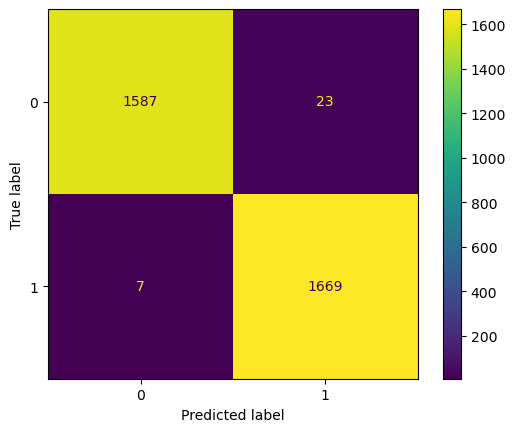

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


**Evaluate on test set**

**ROC Curve**


ROC AUC Score: 1.00


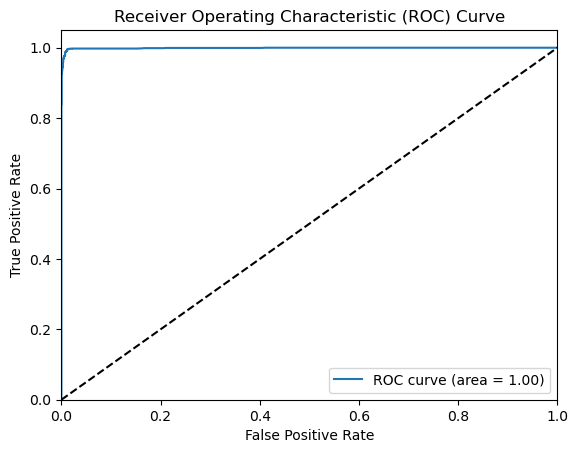

In [29]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# ROC AUC Score
y_test_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Feature Importance Plot**

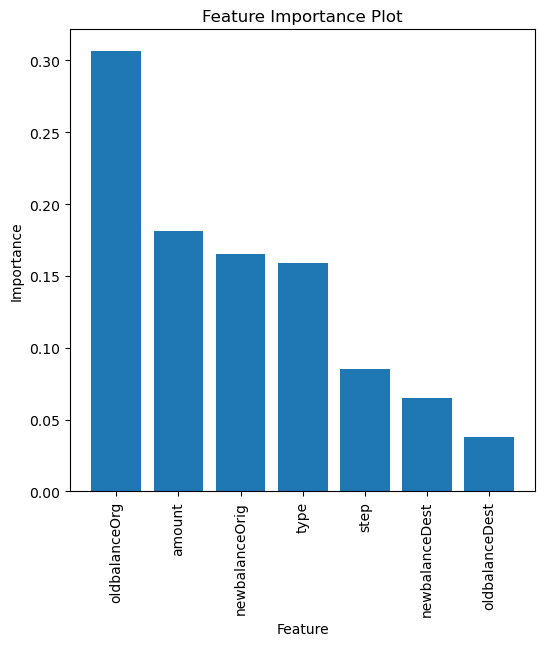

In [30]:
import matplotlib.pyplot as plt
feature_names=data.columns
feature_importances=best_model.feature_importances_
indices=feature_importances.argsort()[::-1]
plt.figure(figsize=(6, 6))
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

**Cross-Validation**

In [31]:
#To ensure the robustness of your model, use cross-validation.
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [0.99482654 0.99391172 0.99025875 0.99299848 0.99238965]
Mean CV Accuracy: 0.99


**Save the best model**

In [32]:
import joblib

joblib.dump(best_model, 'rf_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [33]:
#To Load the model from the file
model = joblib.load('rf_model.pkl')
print("Model loaded successfully.")

Model loaded successfully.
